In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load the datasets
train_data_path = "rocketskillshots_train.csv"
test_data_path = "rocketskillshots_test.csv"
sample_submission_path = "sample_submission.csv"

# Load training and test data
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_path)

# Display the first few rows of the training data
print("Training Data Sample:")
print(train_df.head())

Training Data Sample:
   id  window_id  BallAcceleration      Time  DistanceWall  DistanceCeil  \
0   0        NaN          0.000000  2.205022       3817.38       2013.00   
1   0        0.0       1636.798772  0.000000       3498.01       2012.98   
2   0        1.0       3198.029397  0.138893       3494.08       2012.98   
3   0        2.0          0.000000  0.173617       3494.08       2012.98   
4   0        3.0       9914.766242  0.312510       3500.08       2012.98   

   DistanceBall    PlayerSpeed      BallSpeed   up  ...  slow_skew  goal_skew  \
0           NaN  150959.239888  145648.061660  0.0  ...   5.656854   3.795046   
1           NaN  104267.426232   99035.849337  0.0  ...        NaN        NaN   
2     229.89678  124248.031988  102233.878734  0.0  ...        NaN        NaN   
3           NaN  124248.031988  102968.358990  0.0  ...        NaN        NaN   
4           NaN  115248.016009  112883.125231  0.0  ...        NaN        NaN   

   left_skew  boost_skew  camera_s

In [3]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

# Summary statistics of numeric columns
print("\nSummary Statistics for Training Data:")
print(train_df.describe())


Missing Values in Training Data:
id                          0
window_id                 178
BallAcceleration           45
Time                        0
DistanceWall               93
DistanceCeil              116
DistanceBall             3112
PlayerSpeed                 0
BallSpeed                  36
up                          0
accelerate                  0
slow                        0
goal                        0
left                        0
boost                       0
camera                      0
down                        0
right                       0
slide                       0
jump                        0
BallAcceleration_skew    3959
Time_skew                3959
DistanceWall_skew        3959
DistanceCeil_skew        3959
DistanceBall_skew        3959
PlayerSpeed_skew         3959
BallSpeed_skew           3959
up_skew                  3959
accelerate_skew          3959
slow_skew                3959
goal_skew                3959
left_skew                3959
boost_

/tmp/ipykernel_1715/1007604440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='Set2')


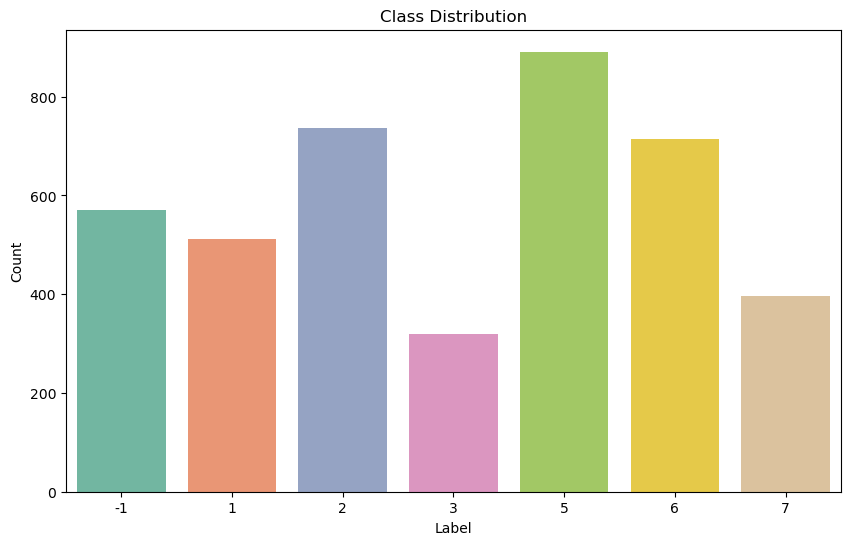

In [4]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [ ]:
numeric_columns = [
    col for col in train_df.select_dtypes(include=[np.number]).columns
    if col not in ['label', 'id', 'window_id']
]

# Handle missing values for numeric features only
imputer = SimpleImputer(strategy='median')
train_df[numeric_columns] = imputer.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = imputer.transform(test_df[numeric_columns])

# normalize/standardize
scaler = StandardScaler()
train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = scaler.transform(test_df[numeric_columns])

print("\nProcessed Training Data Sample:")
print(train_df.head())

train_df.to_csv("processed_train.csv", index=False)
test_df.to_csv("processed_test.csv", index=False)


Processed Training Data Sample:
   id  window_id  BallAcceleration      Time  DistanceWall  DistanceCeil  \
0   0        NaN          0.081795  0.106360      0.003767      0.579105   
1   0        0.0          0.117275 -1.168543     -0.019862      0.579067   
2   0        1.0          0.151117 -1.088238     -0.020153      0.579067   
3   0        2.0          0.081795 -1.068161     -0.020153      0.579067   
4   0        3.0          0.296714 -0.987856     -0.019709      0.579067   

   DistanceBall  PlayerSpeed  BallSpeed        up  ...  slow_skew  goal_skew  \
0     -0.198541     0.011953   0.302013 -0.215903  ...   2.824127   7.991344   
1     -0.198541    -0.939655  -0.346629 -0.215903  ...   0.058933  -0.004613   
2     -0.443316    -0.532438  -0.302126 -0.215903  ...   0.058933  -0.004613   
3     -0.198541    -0.532438  -0.291906 -0.215903  ...   0.058933  -0.004613   
4     -0.198541    -0.715864  -0.153935 -0.215903  ...   0.058933  -0.004613   

   left_skew  boost_skew  cam

In [6]:
# Split the data into training and validation sets
X = train_df.drop(columns=['label', 'id', 'window_id'])  # Features
y = train_df['label']  # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)


Training Set Shape: (3309, 36)
Validation Set Shape: (828, 36)



Decision Tree Classifier Performance:
Accuracy: 0.7306763285024155
Classification Report:
               precision    recall  f1-score   support

          -1       0.65      0.66      0.65       114
           1       0.74      0.77      0.76       102
           2       0.81      0.73      0.77       147
           3       0.72      0.73      0.73        64
           5       0.82      0.87      0.84       179
           6       0.68      0.71      0.69       143
           7       0.58      0.51      0.54        79

    accuracy                           0.73       828
   macro avg       0.71      0.71      0.71       828
weighted avg       0.73      0.73      0.73       828

Confusion Matrix:


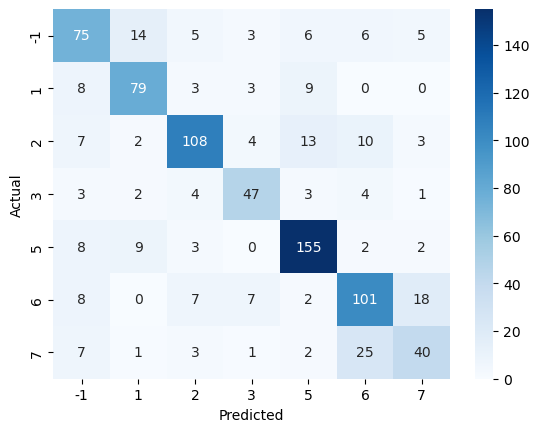

In [ ]:
# Training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_val_pred_dt = dt_model.predict(X_val)

# Evaluations
print("\nDecision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_val_pred_dt))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Random Forest Classifier Performance:
Accuracy: 0.8079710144927537
Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.61      0.73       114
           1       0.80      0.84      0.82       102
           2       0.79      0.94      0.86       147
           3       0.90      0.86      0.88        64
           5       0.88      0.94      0.91       179
           6       0.72      0.81      0.76       143
           7       0.65      0.47      0.54        79

    accuracy                           0.81       828
   macro avg       0.81      0.78      0.79       828
weighted avg       0.81      0.81      0.80       828

Confusion Matrix:


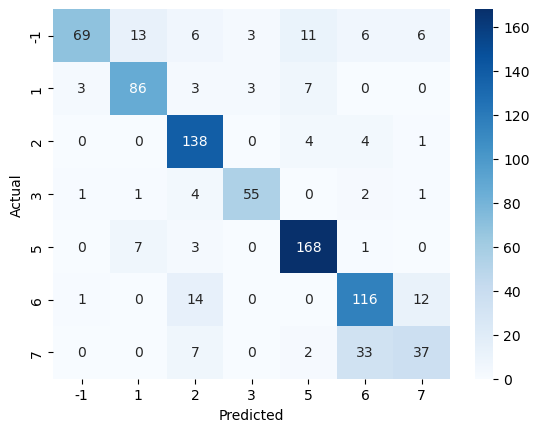

In [ ]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_val_pred_rf = rf_model.predict(X_val)

# Evaluation
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
X_test = test_df.drop(columns=['id', 'window_id'], errors='ignore') 
X_test = X_test.loc[:, X_train.columns]

y_test_pred = rf_model.predict(X_test)

# Group predictions by 'id' and assign most common label per ID
test_df['label'] = y_test_pred
submission = test_df.groupby('id')['label'].agg(lambda x: x.mode()[0]).reset_index()

submission.to_csv("submission.csv", index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, 30, None],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None]   # Features to consider at each split
}

# Initialize
rf_model = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all available processors
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_rf_model = grid_search.best_estimator_

y_val_pred_optimized = best_rf_model.predict(X_val)

# Performance
print("\nOptimized Random Forest Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_optimized))
print("Classification Report:\n", classification_report(y_val, y_val_pred_optimized))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt

In [ ]:
# exclusion of non-feature columns
feature_columns = [col for col in test_df.columns if col not in ['id', 'window_id', 'label']]
X_test = test_df[feature_columns]

# Make predictions on the test set using the optimized model
y_test_pred_optimized = best_rf_model.predict(X_test)

test_df['label'] = y_test_pred_optimized

submission = test_df[['id', 'label']]
submission = submission.groupby('id', as_index=False).agg({'label': lambda x: x.mode()[0]})
submission.to_csv("submission.csv", index=False)

Submission file 'submission.csv' created successfully!



Enhanced Training Data Sample:
   id  window_id  BallAcceleration      Time  DistanceWall  DistanceCeil  \
0   0        NaN          0.081795  0.106360      0.003767      0.579105   
1   0        0.0          0.117275 -1.168543     -0.019862      0.579067   
2   0        1.0          0.151117 -1.088238     -0.020153      0.579067   
3   0        2.0          0.081795 -1.068161     -0.020153      0.579067   
4   0        3.0          0.296714 -0.987856     -0.019709      0.579067   

   DistanceBall  PlayerSpeed  BallSpeed  BallAcceleration_skew  ...  \
0     -0.198541     0.011953   0.302013              -6.308547  ...   
1     -0.198541    -0.939655  -0.346629              -0.044063  ...   
2     -0.443316    -0.532438  -0.302126              -0.044063  ...   
3     -0.198541    -0.532438  -0.291906              -0.044063  ...   
4     -0.198541    -0.715864  -0.153935              -0.044063  ...   

   slide_skew_min  slide_skew_max  slide_skew_sum  jump_skew_mean  \
0             N